In [1]:
import itertools
import time
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

%matplotlib inline
plt.style.use('ggplot')

In [2]:
data_0 = pd.read_csv('final2.csv')
data_0=data_0.drop(['BIRTH','SCREEN','DEPLOY','OTHERDRUGS','METHADONE','ANYOPIATEDAYS','HALLUC','SEX', 'HISPANIC', 'RACE', 'VET', 'ACTIVE','DAYSCOCAINE','METHDAYS','AGE' ],axis=1)
data_0=data_0.dropna()
#data_0.columns.str.strip()
data_0.columns
df=data_0.copy()
df=df.dropna()
df=df.sample(frac=1)
df.columns

Index(['DAST', 'AUDIT', 'COSCREEN', 'BI', 'BT', 'RT', 'ANYALC', 'BINGEDAYS',
       'DRUGDAYS', 'ALCDRUGS', 'MARYJDAYS', 'INJECT', 'TOBMONTH'],
      dtype='object')

In [3]:
df['DAST'] = df['DAST'].astype(float).astype(int)
# df['SEX'] = df['SEX'].astype(float).astype(int)
# df['HISPANIC'] = df['HISPANIC'].astype(float).astype(int)
# df['RACE'] = df['RACE'].astype(float).astype(int)
# df['VET'] = df['VET'].astype(float).astype(int)
# df['ACTIVE'] = df['ACTIVE'].astype(float).astype(int)
# df['DEPLOY'] = df['DEPLOY'].astype(float).astype(int)
df['AUDIT'] = df['AUDIT'].astype(float).astype(int)
df['COSCREEN'] = df['COSCREEN'].astype(float).astype(int)
df['RT'] = df['RT'].astype(float).astype(int)
df['BI'] = df['BI'].astype(float).astype(int)
df['BT'] = df['BT'].astype(float).astype(int)
df['INJECT'] = df['INJECT'].astype(float).astype(int)
df['TOBMONTH'] = df['TOBMONTH'].astype(float).astype(int)
###############################################################
df['ANYALC'] = df['ANYALC'].astype(float).astype(int)
df['BINGEDAYS'] = df['BINGEDAYS'].astype(float).astype(int)
df['DRUGDAYS'] = df['DRUGDAYS'].astype(float).astype(int)
df['ALCDRUGS'] = df['ALCDRUGS'].astype(float).astype(int)
# df['DAYSCOCAINE'] = df['DAYSCOCAINE'].astype(float).astype(int)
df['MARYJDAYS'] = df['MARYJDAYS'].astype(float).astype(int)
# df['METHDAYS'] = df['METHDAYS'].astype(float).astype(int)
# df['AGE'] = df['AGE'].astype(float).astype(int)
df

,DAST,AUDIT,COSCREEN,BI,BT,RT,ANYALC,BINGEDAYS,DRUGDAYS,ALCDRUGS,MARYJDAYS,INJECT,TOBMONTH
6211,2,0,1,0,1,0,4,0,30,4,30,0,0
553,0,0,0,0,0,0,0,0,0,0,0,0,0
4121,0,0,0,0,0,0,0,0,0,0,0,0,0
4224,0,0,0,0,0,0,0,0,0,0,0,0,0
2879,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3569,0,0,0,0,0,0,0,0,0,0,0,0,0
5093,0,0,0,0,0,0,0,0,0,0,0,0,0
712,0,0,0,0,0,0,0,0,0,0,0,0,0
918,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
#'SEX', 'HISPANIC', 'RACE', 'VET', 'ACTIVE', 'DEPLOY', 'AUDIT',
 #      'COSCREEN', 'BI', 'BT', 'RT', 'ANYALC', 
df = pd.get_dummies(df, columns = [  'INJECT', 'BI', 'BT', 'RT', 'COSCREEN', 'AUDIT','TOBMONTH'
       ],drop_first = True)
df.head(3)

,DAST,ANYALC,BINGEDAYS,DRUGDAYS,ALCDRUGS,MARYJDAYS,INJECT_1,BI_1,BT_1,RT_1,COSCREEN_1,AUDIT_1,AUDIT_2,TOBMONTH_1
6211,2,4,0,30,4,30,0,0,1,0,1,0,0,0
553,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4121,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared

In [6]:
#Importing tqdm for the progress bar
from tqdm import tnrange, tqdm_notebook, trange
#Initialization variables
Y = df.DAST
X = df.drop(columns = 'DAST', axis = 1)
print(X.columns)
k = 13
RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

#Looping over k = 1 to k = 11 features in X
for k in trange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 11 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],Y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})


Index(['ANYALC', 'BINGEDAYS', 'DRUGDAYS', 'ALCDRUGS', 'MARYJDAYS', 'INJECT_1',
       'BI_1', 'BT_1', 'RT_1', 'COSCREEN_1', 'AUDIT_1', 'AUDIT_2',
       'TOBMONTH_1'],
      dtype='object')


Loop...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:36<00:00,  2.78s/it]


In [7]:
df_min = df[df.groupby('numb_features')['RSS'].transform(min) == df['RSS']]
df_max = df[df.groupby('numb_features')['R_squared'].transform(max) == df['R_squared']]
display(df_min.head(3))
display(df_max.head(3))

,numb_features,RSS,R_squared,features
8,1,352.516663,0.402042,"(RT_1,)"
71,2,196.074343,0.667408,"(BI_1, RT_1)"
342,3,127.569923,0.783609,"(BI_1, BT_1, RT_1)"


,numb_features,RSS,R_squared,features
8,1,352.516663,0.402042,"(RT_1,)"
71,2,196.074343,0.667408,"(BI_1, RT_1)"
342,3,127.569923,0.783609,"(BI_1, BT_1, RT_1)"


In [8]:
df['min_RSS'] = df.groupby('numb_features')['RSS'].transform(min)
df['max_R_squared'] = df.groupby('numb_features')['R_squared'].transform(max)
df.head()


,numb_features,RSS,R_squared,features,min_RSS,max_R_squared
0,1,538.585280,0.086422,"(ANYALC,)",352.516663,0.402042
1,1,564.123041,0.043104,"(BINGEDAYS,)",352.516663,0.402042
2,1,426.201634,0.277054,"(DRUGDAYS,)",352.516663,0.402042
3,1,509.311114,0.136079,"(ALCDRUGS,)",352.516663,0.402042
4,1,463.286611,0.214148,"(MARYJDAYS,)",352.516663,0.402042


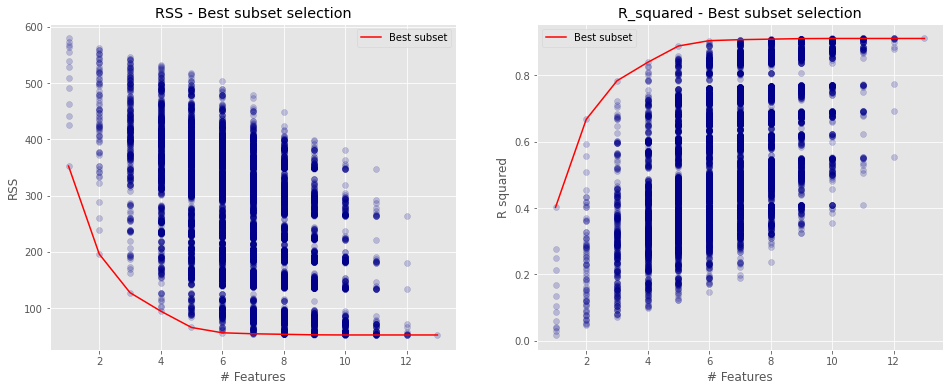

In [9]:
fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax.scatter(df.numb_features,df.RSS, alpha = .2, color = 'darkblue' )
ax.set_xlabel('# Features')
ax.set_ylabel('RSS')
ax.set_title('RSS - Best subset selection')
ax.plot(df.numb_features,df.min_RSS,color = 'r', label = 'Best subset')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.scatter(df.numb_features,df.R_squared, alpha = .2, color = 'darkblue' )
ax.plot(df.numb_features,df.max_R_squared,color = 'r', label = 'Best subset')
ax.set_xlabel('# Features')
ax.set_ylabel('R squared')
ax.set_title('R_squared - Best subset selection')
ax.legend()

plt.show()

In [10]:
#Initialization variables
# Y = df.DAST
# X = df.drop(columns = 'DAST', axis = 1)
# k = 12

remaining_features = list(X.columns.values)
features = []
RSS_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop...
features_list = dict()

for i in range(1,k+1):
    best_RSS = np.inf
    
    for combo in itertools.combinations(remaining_features,1):

            RSS = fit_linear_reg(X[list(combo) + features],Y)   #Store temp result 

            if RSS[0] < best_RSS:
                best_RSS = RSS[0]
                best_R_squared = RSS[1] 
                best_feature = combo[0]

    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)
    
    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()

In [11]:
print('Forward stepwise subset selection')
print('Number of features |', 'Features |', 'RSS')
display([(i,features_list[i], round(RSS_list[i])) for i in range(1,5)])

Forward stepwise subset selection
Number of features | Features | RSS


[(1, ['RT_1'], 353),
 (2, ['RT_1', 'BI_1'], 196),
 (3, ['RT_1', 'BI_1', 'BT_1'], 128),
 (4, ['RT_1', 'BI_1', 'BT_1', 'AUDIT_1'], 95)]

In [12]:
df1 = pd.concat([pd.DataFrame({'features':features_list}),pd.DataFrame({'RSS':RSS_list, 'R_squared': R_squared_list})], axis=1, join='inner')
df1['numb_features'] = df1.index

In [13]:
#Initializing useful variables
m = len(Y)
p = 11
hat_sigma_squared = (1/(m - p -1)) * min(df1['RSS'])

#Computing
df1['C_p'] = (1/m) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['AIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['BIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] +  np.log(m) * df1['numb_features'] * hat_sigma_squared )
df1['R_squared_adj'] = 1 - ( (1 - df1['R_squared'])*(m-1)/(m-df1['numb_features'] -1))
df1


,features,RSS,R_squared,numb_features,C_p,AIC,BIC,R_squared_adj
1,[RT_1],352.516663,0.402042,1,0.077227,6.712121,6.713529,0.401911
2,"[RT_1, BI_1]",196.074343,0.667408,2,0.042962,3.734001,3.736817,0.667262
3,"[RT_1, BI_1, BT_1]",127.569923,0.783609,3,0.027960,2.430161,2.434384,0.783467
4,"[RT_1, BI_1, BT_1, AUDIT_1]",94.743835,0.839290,4,0.020775,1.805612,1.811243,0.839149
5,"[RT_1, BI_1, BT_1, AUDIT_1, AUDIT_2]",65.724660,0.888514,5,0.014423,1.253544,1.260583,0.888392
6,"[RT_1, BI_1, BT_1, AUDIT_1, AUDIT_2, ALCDRUGS]",56.272881,0.904547,6,0.012357,1.074027,1.082473,0.904421
7,"[RT_1, BI_1, BT_1, AUDIT_1, AUDIT_2, ALCDRUGS,...",54.520227,0.907520,7,0.011978,1.041096,1.050950,0.907378
8,"[RT_1, BI_1, BT_1, AUDIT_1, AUDIT_2, ALCDRUGS,...",53.579758,0.909115,8,0.011777,1.023628,1.034890,0.908956
9,"[RT_1, BI_1, BT_1, AUDIT_1, AUDIT_2, ALCDRUGS,...",52.640554,0.910708,9,0.011577,1.006184,1.018854,0.910532
10,"[RT_1, BI_1, BT_1, AUDIT_1, AUDIT_2, ALCDRUGS,...",52.397569,0.911120,10,0.011529,1.001996,1.016073,0.910925


In [14]:
df1.iloc[8,0]

['RT_1',
 'BI_1',
 'BT_1',
 'AUDIT_1',
 'AUDIT_2',
 'ALCDRUGS',
 'ANYALC',
 'INJECT_1',
 'BINGEDAYS']